##### Problem Statement
##### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

##### Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


##### -------------------------------------------------------------

##### Data
##### We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

##### --------------------------------------------------------

##### Evaluation Metric
##### Root mean squared error - RMSE
##### -------------------------------------------------------------------------

In [106]:
#Importing modules required for EDA,plotting and modelling

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Reading the training data and testing data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#Displaying the first five rows of training dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Displating the first five rows of testing dataset 
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#Checking the headers of training and testing dataset and making sure they contain the same headers

print(train.columns.intersection(test.columns))
print(train.columns.difference(test.columns))

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Outlet_Sales'], dtype='object')


#### We can see that the only difference we have is the column Item_Outlet_Sales which is missing in testing data set. This makes sense as we have to predict the values of Item_Outlet_Sales as it is the dependent variable

In [7]:
# Joining training and testing dataset to do EDA
complete_dataset = pd.concat([train,test],axis=0,sort=False)

In [8]:
# Checking the information regarding each columns, here we can see the details regarding the number of not null values, and object type
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


#### Here we can see that total number of rows in complete dataset is 14204 but Item_Weight has 11765 rows and Outlet_Size has 10188 rows which means that many values are missing from these two columns, also Item_Outlet_Sales has only 8523 rows as it contains rows only from training dataset

In [9]:
# Checking the description of Item_Identifier

complete_dataset['Item_Identifier'].describe()

count     14204
unique     1559
top       FDD45
freq         10
Name: Item_Identifier, dtype: object

#### We can see that the unique count is 1559 meaning there are 1559 unique items in the dataset, most item repeated is with the id: FDR07 whose frequency is 10

In [10]:
# Checking the description of Item_Weight

complete_dataset['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

#### The Item_Weight ranges from 4.55 to 21.35, does not seem to have any outliers and as seen before it has may missing values

In [11]:
# Checking the description of Item_Fat_Content

complete_dataset['Item_Fat_Content'].describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

#### Item_Fat_Content is a categorical variable, having five unique categories. The category 'Low Fat' occuring the most times i.e. 8485

In [12]:
# Checking the description of Item_Visibility
complete_dataset['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

#### The Item_Visibility ranges from 0 to 0.32, interesting thing to notice here is that the minimum value of Item_Visibility is 0, this begs the question that if item is not visible how does it have sales

In [13]:
# Checking the description of Item_Type
complete_dataset['Item_Type'].describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

#### Item_Type is a categorical variable, having 16 unique categories. The category 'Fruits and Vegetables' is occuring the most number of times i.e. 2013

In [14]:
# Checking the description of Item_MRP
complete_dataset['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

#### We can see that the least costing item is 31.29 and the most costly item is priced at 266.88

In [15]:
# Checking the description of Outlet_Identifier
complete_dataset['Outlet_Identifier'].describe()

count      14204
unique        10
top       OUT027
freq        1559
Name: Outlet_Identifier, dtype: object

#### Outlet_Identifier is a categorical variable, having 10 unique categories. This information is provided as the data is collected for 10 unique stores. The store 'OUT027' is occuring the most number of times i.e. 1559, interesting the unique number of items are 1559, implying that this particular store has sold all the products of the dataset

In [16]:
# Checking the description of Outlet_Establishment_Year
complete_dataset['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

#### The oldest outlet is established in 1985 and the newest outlet is established in 2009

In [17]:
# Checking the description of Outlet_Size
complete_dataset['Outlet_Size'].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

#### Outlet_Size is a categorical variable having 3 categories, as seen before Outlet_Size has many missing values, apart from that we can see that Medium Size Outlet has most number of rows i.e. 4655

In [18]:
# Checking the description of Outlet_Location_Type
complete_dataset['Outlet_Location_Type'].describe()

count      14204
unique         3
top       Tier 3
freq        5583
Name: Outlet_Location_Type, dtype: object

#### Outlet_Location_Type is a categorical variable having 3 categories, with Tier 3 occuring the most number of times i.e. 5583

In [19]:
# Checking the description of Outlet_Type
complete_dataset['Outlet_Type'].describe()

count                 14204
unique                    4
top       Supermarket Type1
freq                   9294
Name: Outlet_Type, dtype: object

#### Outlet_Type is a categorical variable having 4 categories with Supermarket Type1 occuring the most number of times i.e 9294

In [20]:
# Checking the description of Item_Outlet_Sales
complete_dataset['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### The Minimun value of a sale is 33.29 and the Maximum value of sale is 13086.96, there seems to be a lot of variation, and might contain outliers

In [21]:
# Checking the unique categories of Item_Fat_Content
print(complete_dataset['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


#### We can see that there are 5 unique categories but 'LF','Low Fat','low fat' and 'Regular','reg' seems to be variant of two categories 'Low Fat' and 'Regular'. So it is advisable to replace the variants and make this into totally two categories

In [22]:
complete_dataset['Item_Fat_Content'] = complete_dataset['Item_Fat_Content'].replace('LF','Low Fat')
complete_dataset['Item_Fat_Content'] = complete_dataset['Item_Fat_Content'].replace('low fat','Low Fat')
complete_dataset['Item_Fat_Content'] = complete_dataset['Item_Fat_Content'].replace('reg','Regular')

In [23]:
# Checking the unique categories of Item_Fat_Content
print(complete_dataset['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


#### We can see that now there are only two categories 'Low Fat' and 'Regular'

In [24]:
# Checking the unique categories of Item_Type
print(complete_dataset['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


#### There are 16 unique categories, maybe there is a way to group these categories but right now I'll let it be

In [25]:
# Checking the unique categories of Outlet_Identifier
print(complete_dataset['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


#### There are 10 unique categories as there are 10 stores

In [26]:
# Checking the unique categories of Outlet_Size
print(complete_dataset['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


####  There are 3 unique categories and there is also NAN, which suggests that there are missing values in Outlet_Size which was also seen in the description

In [27]:
# Checking the unique categories of Outlet_Location_Type
print(complete_dataset['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


#### There are 3 unique location types

In [28]:
# Checking the unique categories of Outlet_Type
print(complete_dataset['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### There are 4 unique Outlet Types

In [29]:
#### Checking the rows having null values in Outlet_Size to check whether there is a pattern to it
#### Viewing both head and tail so as to check values of both training and testing dataset and whether both follow the same pattern or not
display(complete_dataset[(pd.isnull(complete_dataset['Outlet_Size']))].head(20))
display(complete_dataset[(pd.isnull(complete_dataset['Outlet_Size']))].tail(20))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5594,FDM28,15.700,Low Fat,0.045460,Frozen Foods,178.2660,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5602,FDO21,11.600,Regular,0.009783,Snack Foods,224.8404,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5603,FDW39,6.690,Regular,0.000000,Meat,178.0370,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5607,DRF48,5.730,Low Fat,0.052094,Soft Drinks,185.4898,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5613,FDA16,6.695,Low Fat,0.034134,Frozen Foods,219.5456,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5618,FDU09,7.710,Regular,0.066974,Snack Foods,54.1956,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5620,FDB15,10.895,Low Fat,0.137088,Dairy,265.0568,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5624,FDP27,8.155,Low Fat,0.120126,Meat,191.6530,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5631,FDA03,18.500,Regular,0.045556,Dairy,147.1102,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5639,NCN26,10.850,Low Fat,0.028842,Household,116.9808,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


#### We can see that when the Outlet_Identier is either 'OUT010' or 'OUT017' or 'OUT045', Outlet_Size seems to be NaN and this pattern is followed both by training and testing data set

#### 1. OUT010 belongs to Tier 3 and it is a Grocery Store
#### 2. OUT017 belongs to Tier 2 and it is a Supermarket Type1
#### 3. OUT045 belongs to Tier 2 and it is a Supermarket Type1

In [30]:
#### Grouping Outlet_Identifier(s) with Outlet_Location_Type(s) and Outlet_Type(s)
complete_dataset.groupby(['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']).first().sort_values(by='Outlet_Location_Type')

,,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,,,,,,,,,
OUT019,Tier 1,Grocery Store,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,214.3876
OUT046,Tier 1,Supermarket Type1,FDA03,18.50,Regular,0.045464,Dairy,144.1102,1997,Small,2187.1530
OUT049,Tier 1,Supermarket Type1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,3735.1380
OUT017,Tier 2,Supermarket Type1,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,4710.5350
OUT035,Tier 2,Supermarket Type1,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,2004,Small,2748.4224
OUT045,Tier 2,Supermarket Type1,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,1076.5986
OUT010,Tier 3,Grocery Store,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,732.3800
OUT013,Tier 3,Supermarket Type1,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,994.7052
OUT018,Tier 3,Supermarket Type2,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,443.4228


#### Supermarket Type1 is in all the tiers and there are 6 out of 10 stores of Outlet_Type-Supermarket Type1 which is the highest, Grocery Store is in Tier 1 and Tier 3
#### For Supermarket Type1, in Tier 1, the Outlet_Size(s) are 'Small' and 'Medium', In Tier 2, the Outlet_Size(s) are NaN and Small where two of them are NaN and One is Small, In Tier 3, the Outlet_Size is High
#### For Grocery Store, in Tier 1, the Outlet_Size is Small and In Tier 3, the Outlet_Size is NaN

#### There does not seem to be any relation between Outlet_Establishment_Year and Outlet_Size

#### We can see one pattern in Supermarket Type1 that each store of a particular Tier has a different size
#### Assuming that we can backfill the NaN value of one store of Supermarket Type1 as Medium and another one as High as there is already a store of Outlet_Size 'Small' in 'Tier 2'

#### Grocery Stores are usually small in size compared to Supermarkets andhence backfilling Grocery Store Size with Small

In [31]:
### Syntax for dealing with SettingWithCopyWarning
# df[df['A'] > 2]['B'] = new_val
# df.loc[df['A'] > 2, 'B'] = new_val
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT010','Outlet_Size'] = 'Small'
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT017','Outlet_Size'] = 'Medium'
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT045','Outlet_Size'] = 'High'

In [32]:
#### Grouping Outlet_Identifier(s) with Outlet_Location_Type(s) and Outlet_Type(s)
complete_dataset.groupby(['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']).first().sort_values(by='Outlet_Location_Type')

,,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,,,,,,,,,
OUT019,Tier 1,Grocery Store,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,214.3876
OUT046,Tier 1,Supermarket Type1,FDA03,18.50,Regular,0.045464,Dairy,144.1102,1997,Small,2187.1530
OUT049,Tier 1,Supermarket Type1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,3735.1380
OUT017,Tier 2,Supermarket Type1,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,4710.5350
OUT035,Tier 2,Supermarket Type1,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,2004,Small,2748.4224
OUT045,Tier 2,Supermarket Type1,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,High,1076.5986
OUT010,Tier 3,Grocery Store,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,732.3800
OUT013,Tier 3,Supermarket Type1,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,994.7052
OUT018,Tier 3,Supermarket Type2,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,443.4228


#### We can see that NAN values are replaced in Outlet_Size

In [33]:
#### Checking the rows having null values in Item_Weight to check whether there is a pattern to it
#### Viewing both head and tail so as to check values of both training and testing dataset and whether both follow the same pattern or not
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))].head(20))
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))].tail(20))
len(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5566,FDW47,NaN,Low Fat,0.046151,Breads,123.8414,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5567,FDT51,NaN,Regular,0.010866,Meat,111.4544,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5583,NCG18,NaN,Low Fat,0.040231,Household,101.2332,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5593,FDU22,NaN,Low Fat,0.092845,Snack Foods,116.8124,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5596,FDJ15,NaN,Regular,0.040835,Dairy,185.0608,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5600,FDA07,NaN,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5609,FDP28,NaN,Regular,0.080250,Frozen Foods,259.4936,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5615,FDF04,NaN,Low Fat,0.013571,Frozen Foods,258.5304,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5625,FDQ44,NaN,Low Fat,0.035965,Fruits and Vegetables,121.1756,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5626,FDL50,NaN,Regular,0.042108,Canned,125.5046,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


2439

#### We can see that when the Outlet_Identifier is either 'OUT019' or 'OUT027' the Item_Weight is found to be NaN
#### Each Item_Identifier i.e. Item has it's own Item_Weight, so we can replace the Item_Weight with the values using Item_Identifier. This is possible as the same items are sold in different stores and these do have Item_Weight associated with it

In [34]:
item_ids = complete_dataset.groupby("Item_Identifier")["Item_Weight"].mean()
for i in item_ids.index:
    complete_dataset.loc[(complete_dataset["Item_Identifier"]==i) & (complete_dataset["Item_Weight"].isna()),"Item_Weight"] = item_ids[i]

In [35]:
#### Checking the rows having null values in Item_Weight to check whether there is a pattern to it
#### Viewing both head and tail so as to check values of both training and testing dataset and whether both follow the same pattern or not
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


#### We can see that all the NAN values in Item_Weight has been replaced

In [36]:
#Concatenating dummy variables to the dataset
dummy_dataset = pd.get_dummies(complete_dataset,columns=['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [37]:
#Converting Low Fat to 0 and Regular to 1
dummy_dataset['Item_Fat_Content'] = dummy_dataset['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [38]:
dummy_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,1999,3735.1380,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,2009,443.4228,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,1999,2097.2700,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,1998,732.3800,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,1987,994.7052,0,0,0,...,0,0,1,1,0,0,0,1,0,0


#### We can see that all the categorical variables have been converted to dummy variables

In [39]:
dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 43 columns):
Item_Identifier                    14204 non-null object
Item_Weight                        14204 non-null float64
Item_Fat_Content                   14204 non-null int64
Item_Visibility                    14204 non-null float64
Item_MRP                           14204 non-null float64
Outlet_Establishment_Year          14204 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Type_Baking Goods             14204 non-null uint8
Item_Type_Breads                   14204 non-null uint8
Item_Type_Breakfast                14204 non-null uint8
Item_Type_Canned                   14204 non-null uint8
Item_Type_Dairy                    14204 non-null uint8
Item_Type_Frozen Foods             14204 non-null uint8
Item_Type_Fruits and Vegetables    14204 non-null uint8
Item_Type_Hard Drinks              14204 non-null uint8
Item_Type_Health and Hygiene       14204 non

In [40]:
#Saving this to csv file so that it can be used next time
dummy_dataset.to_csv('dummy_dataset.csv',index=False)

In [41]:
#As we have done the required preprocessing we can seperate the training and testing dataset

In [42]:
#Seperating training and testing set
train_set = dummy_dataset[:8523]
test_set = dummy_dataset[8523:]

In [43]:
#Saving csv files of Training Dataset and Testing Dataset
train_set.to_csv('trainset.csv')
test_set.to_csv('testset.csv')

In [44]:
#Saving non dummy train set into another object and saving it to csv
train_non_dummy = complete_dataset[:8523]
train_non_dummy.to_csv('train_non_dummy.csv')

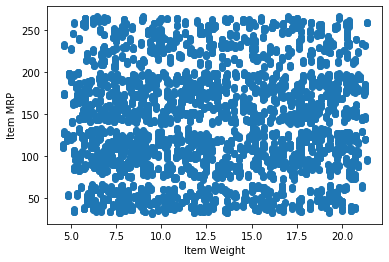

In [45]:
#Scatter Plot:Item_Weight Vs Item_MRP
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')
plt.scatter(train_non_dummy['Item_Weight'],train_non_dummy['Item_MRP'])

#### Item_Weight does not seem to have any relation with Item_MRP. This may be because the Item_Weight is package weight of the item, Item MRP depends on what kind of item it is rather than the weight of the item

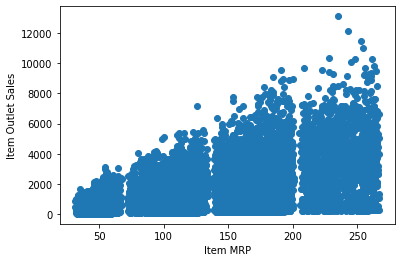

In [46]:
#Scatter Plot:Item_MRP Vs Item_Outlet_Sales
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.scatter(train_non_dummy['Item_MRP'],train_non_dummy['Item_Outlet_Sales'])

#### Item MRP ranges from 0 to 250 and the sales of the respective items ranges from 0 to 12000. We can see that the as the MRP increases, Sale amount is also increasing. This is surprising as costlier items are usually are the ones that are bought less. But this dataset is a summarized yearly sale amount, considering that even though if the quantity sold of costlier item might be less, the total sum would be more and hence this trend

(0, 0.05)

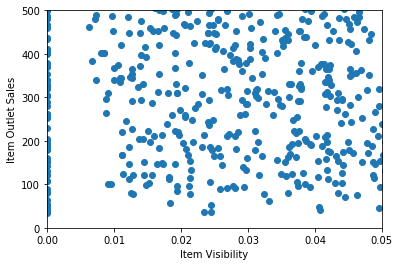

In [47]:
#Scatter Plot:Item_Visibility Vs Item_Outlet_Sales
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.scatter(train_non_dummy['Item_Visibility'],train_non_dummy['Item_Outlet_Sales'])
ylim(0,500)
xlim(0,0.05)

#### The data points in the plot of Item_Visibility Vs Item_Outlet_Sales seem to be all over the place. No general trends are seen here. This may be because the scale of Item_Visibility is too small in comparison to Item_Outlet_Sales

In [84]:
#Grouping the sales by Item_Fat_Content
train_non_dummy.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].agg(['count','sum','mean'])

,count,sum,mean
Item_Fat_Content,,,
Low Fat,5517,1.190409e+07,2157.711534
Regular,3006,6.687031e+06,2224.561170


#### There are more Low Fat Items in the dataset than Regular Items hence total sales are more too

In [85]:
#Grouping the sales by Outlet_Location_Type, Outlet_Type and Outlet_Size
train_non_dummy.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].agg(['count','sum','mean'])

count           sum  \
Outlet_Location_Type Outlet_Type       Outlet_Size                        
Tier 1               Grocery Store     Small          528  1.796941e+05   
                     Supermarket Type1 Medium         930  2.183970e+06   
                                       Small          930  2.118395e+06   
Tier 2               Supermarket Type1 High           929  2.036725e+06   
                                       Medium         926  2.167465e+06   
                                       Small          930  2.268123e+06   
Tier 3               Grocery Store     Small          555  1.883402e+05   
                     Supermarket Type1 High           932  2.142664e+06   
                     Supermarket Type2 Medium         928  1.851823e+06   
                     Supermarket Type3 Medium         935  3.453926e+06   

                                                           mean  
Outlet_Location_Type Outlet_Type       Outlet_Size               
Tier 1               Grocery Store     Small         340.329723  
                     Supermarket Type1 Medium       2348.354635  
                                       Small        2277.844267  
Tier 2               Supermarket Type1 High         2192.384798  
                                       Medium       2340.675263  
                                       Small        2438.841866  
Tier 3               Grocery Store     Small         339.351662  
                     Supermarket Type1 High         2298.995256  
                     Supermarket Type2 Medium       1995.498739  
                     Supermarket Type3 Medium       3694.038558

#### We can see that the total sales of Supermarket Type1 across all the Tiers is in range of (2*10^6) which means that irrespective of size and tier of the outlet the sale remains the same.
#### The total sale amount of Grocery Store is the least lying in the range of (1.79*10^5) with an average sale of just 340.32
#### The total sale amount of Supermarket Type2 lies in the range of (1.85*10^6) which is little less than Supermarket Type1
#### The total sale amount of Supermarket Type3 lies in the range of (3*10^6) which is the highest of all the Outlets
#### In conclusion the total sale amount of Grocery is too less than Supermarket Type(s) and among the Supermarket Type(s) Supermarket Type3 has the maximum sale amount whereas Supermarket Type2 has the least sale amount and Supermarket Type1 is between these two Supermarkets

In [86]:
#Grouping the sales by Item_Type 
train_non_dummy.groupby(['Item_Type'])['Item_Outlet_Sales'].agg(['count','sum','mean'])

,count,sum,mean
Item_Type,,,
Baking Goods,648,1.265525e+06,1952.971207
Breads,251,5.532372e+05,2204.132226
Breakfast,110,2.322990e+05,2111.808651
Canned,649,1.444151e+06,2225.194904
Dairy,682,1.522594e+06,2232.542597
Frozen Foods,856,1.825735e+06,2132.867744
Fruits and Vegetables,1232,2.820060e+06,2289.009592
Hard Drinks,214,4.577934e+05,2139.221622
Health and Hygiene,520,1.045200e+06,2010.000265


#### 'Seafood' sells the least whereas 'Fruits and Vegetables' sell the most. The total sale amount ranges from (1.4 * 10^5) to (2.8 * 10^6)

In [50]:
#Grouping the sales by Item_Type 
pd.set_option("display.max_rows", 100)
groupby_item_outlet = train_non_dummy.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].agg(['sum','mean'])

In [87]:
train_non_dummy.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].agg(['count','sum','mean'])

count           sum         mean
Outlet_Type       Item_Type                                              
Grocery Store     Baking Goods              85  2.482702e+04   292.082544
                  Breads                    33  1.260493e+04   381.967442
                  Breakfast                 19  7.843790e+03   412.831042
                  Canned                    73  2.575914e+04   352.864879
                  Dairy                     92  3.145173e+04   341.866589
                  Frozen Foods             103  3.319546e+04   322.285984
                  Fruits and Vegetables    152  4.860207e+04   319.750450
                  Hard Drinks               24  5.835737e+03   243.155708
                  Health and Hygiene        67  2.451542e+04   365.901818
                  Household                119  4.370711e+04   367.286612
                  Meat                      66  2.557671e+04   387.525864
                  Others                    27  7.778541e+03   288.094126
                  Seafood                   10  2.284360e+03   228.435980
                  Snack Foods              146  5.159617e+04   353.398432
                  Soft Drinks               54  1.855451e+04   343.602119
                  Starchy Foods             13  3.901588e+03   300.122154
Supermarket Type1 Baking Goods             426  8.954611e+05  2102.021249
                  Breads                   160  3.755085e+05  2346.928355
                  Breakfast                 68  1.515268e+05  2228.334688
                  Canned                   426  1.000560e+06  2348.732970
                  Dairy                    450  1.076694e+06  2392.654389
                  Frozen Foods             572  1.292668e+06  2259.909110
                  Fruits and Vegetables    805  1.931958e+06  2399.947642
                  Hard Drinks              145  3.235542e+05  2231.408037
                  Health and Hygiene       335  7.127549e+05  2127.626505
                  Household                597  1.437220e+06  2407.403432
                  Meat                     257  5.810450e+05  2260.875454
                  Others                   107  2.401527e+05  2244.418022
                  Seafood                   40  1.056079e+05  2640.196610
                  Snack Foods              785  1.889387e+06  2406.862759
                  Soft Drinks              300  6.380255e+05  2126.751624
                  Starchy Foods            104  2.652181e+05  2550.174048
Supermarket Type2 Baking Goods              68  1.210651e+05  1780.368782
                  Breads                    27  5.460492e+04  2022.404489
                  Breakfast                 12  2.249605e+04  1874.670867
                  Canned                    78  1.456817e+05  1867.714110
                  Dairy                     73  1.521306e+05  2083.981362
                  Frozen Foods              92  1.835990e+05  1995.641420
                  Fruits and Vegetables    135  2.634717e+05  1951.642279
                  Hard Drinks               22  4.944564e+04  2247.528955
                  Health and Hygiene        58  1.088456e+05  1876.649134
                  Household                 95  1.962672e+05  2065.970392
                  Meat                      46  9.465545e+04  2057.727270
                  Others                    20  3.707241e+04  1853.620490
                  Seafood                    7  2.216648e+04  3166.639914
                  Snack Foods              132  2.787145e+05  2111.473733
                  Soft Drinks               46  8.849547e+04  1923.814626
                  Starchy Foods             17  3.311090e+04  1947.699988
Supermarket Type3 Baking Goods              69  2.241722e+05  3248.872417
                  Breads                    31  1.105188e+05  3565.122748
                  Breakfast                 11  5.043235e+04  4584.759327
                  Canned                    72  2.721504e+05  3779.866814
                  Dairy                     6

In [52]:
display(groupby_item_outlet.max(level='Outlet_Type'))
display(groupby_item_outlet.min(level='Outlet_Type'))

,sum,mean
Outlet_Type,,
Grocery Store,5.159617e+04,412.831042
Supermarket Type1,1.931958e+06,2640.196610
Supermarket Type2,2.787145e+05,3166.639914
Supermarket Type3,5.760282e+05,4584.759327


,sum,mean
Outlet_Type,,
Grocery Store,2284.3598,228.435980
Supermarket Type1,105607.8644,2102.021249
Supermarket Type2,22166.4794,1780.368782
Supermarket Type3,18809.5158,2687.073686


#### In Grocery Store and Supermarket Type2 Top Selling item is of type Snack Foods whereas in Supermarket Type1 and Supermarket Type3 Top Selling item is of type Fruits and Vegetables

#### In all the Outlet_Types the Least selling item is Seafood

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

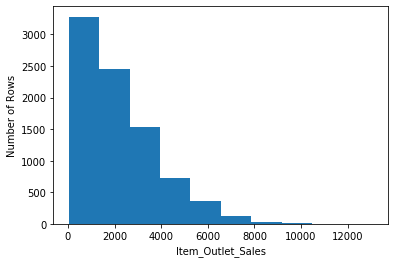

In [82]:
#Histogram of Item_Outlet_Sales
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of Rows')
plt.hist(train_non_dummy['Item_Outlet_Sales'])

#### Viewing histogram, it seems that most of the data points of Item_Outlet_Sales are between 0 and 4000, as the total sale amount is increasing no of data points are decreasing, this is expected as not all items have high sales

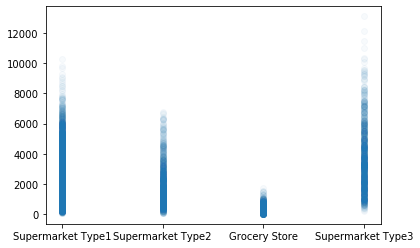

In [62]:
#Scatter Plot: Outlet_Type Vs Item_Outlet_Sales
plt.scatter(train_non_dummy['Outlet_Type'],train_non_dummy['Item_Outlet_Sales'],alpha=0.03)

#### Supermarket Type1: After 7000 there are very less data points
#### Supermarket Type2: After 4000 there are very less data points
#### Grocery Store: Data points dont extend more than 2500
#### Supermarket Type3: After 6000 there are very less data points but the points go till 12000 and above unlike any other Outlet Types

#### From this we can clearly see the way Sale is spread over for different Outlet Types

{'whiskers': [<matplotlib.lines.Line2D at 0x1af47046ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1af470475c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af47046c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1af47047f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af47047ef0>],
 'means': []}

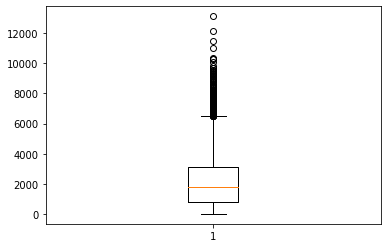

In [69]:
#Boxplot of Item_Outlet_Sales
plt.boxplot(train_non_dummy['Item_Outlet_Sales'])

#### There are many Outliers in Item_Outlet_Sales, this variance may be due to Outlet_Type: Grocery Store as it's maximum sale of an item is very less compared to other Outlet Types

## SUMMARY
### After EDA it is seen that 
##### ->Low Fat Items are more in this data 
##### ->Item Weight don't seem to have effect on Item_MRP or Item_Outlet_Sale
##### ->'Fruits and Vegetables' and 'Snack Foods' are the majority of Item_Types sold, 'Seafood' is the lease Item_Type to be sold
##### ->Supermarket Type1 make up the majority of dataset as it has six stores but as an individual store Grocery Store has the lease sales whereas Supermarket Type3 has the most sales
##### ->Outlet_Location_Type and Outlet_Size do not seem to have relation with the Item_Outlet_Sales

In [101]:
#Modeling
model = linear_model.LinearRegression()

#Not considering the features: Item_Identifier,Item_Weight,Outlet_Type(s),Outlet_Size(s),Outlet_Location_Type(s)
#Instead of using three attributes of Outlet, rather using the feature Outlet_Identifier as it uniquely identifies each store

#Considering headers 2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31
X = train_set.iloc[:,[2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31]].values
y = train_set.iloc[:,6].values
X_test = test_set.iloc[:,[2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31]].values

In [102]:
#Fitting the model then using it to predict
model.fit(X,y)
pred = model.predict(X_test)

In [104]:
#Storing predictions to csv
pred_series = pd.Series(pred)
pred_series.to_csv('newpred.csv')

C:\Users\ajay.jain2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


### After submitting the prediction file to Analytics Vidhya RMSE score obtained is 1203.31608496829

In [107]:
#Checking the summary of the model with statsmodels.API
x_with_intercept = sm.add_constant(X)
res = sm.OLS(y,x_with_intercept).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     406.6
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:30:33   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.6305    105.193      1.860      0.063     -10.574     401.835
x1            40.7178     28.224      1.443      0.149     -14.607      96.043
x2          -303.9310    248.684     -1.222      0.222    -791.412     183.550
x3            15.5646      0.198     78.753      0.000      15.177      15.952
x4           -20.8369    102.972     -0.202      0.840    -222.687     181.013
x5           -15.3073    117.045     -0.131      0.896    -244.743     214.128
x6           -13.5142    142.302     -0.095      0.924    -292.461     265.432
x7             4.6888    102.872      0.046      0.964    -196.965     206.343
x8           -62.0124    102.417     -0.605      0.545    -262.775     138.751
x9           -49.0975    100.545     -0.488      0.625    -246.190     147.995
x10            8.5855     98.244      0.087      0.930    -183.997     201.168
x11          -20.7171    121.382     -0.171      0.864    -258.656     217.222
x12          -31.7711    106.047     -0.300      0.764    -239.649     176.107
x13          -60.5111    100.881     -0.600      0.549    -258.262     137.239
x14          -21.5134    107.924     -0.199      0.842    -233.071     190.044
x15          -43.0204    127.837     -0.337      0.736    -293.611     207.570
x16          163.9209    168.954      0.970      0.332    -167.270     495.112
x17          -32.5224     98.380     -0.331      0.741    -225.372     160.327
x18          -48.3699    107.493     -0.450      0.653    -259.082     162.342
x19        -2003.1091     61.421    -32.613      0.000   -2123.509   -1882.709
x20          -66.1409     52.337     -1.264      0.206    -168.735      36.453
x21            7.2854     52.426      0.139      0.889     -95.482     110.053
x22         -374.5378     52.391     -7.149      0.000    -477.237    -271.839
x23        -1984.9988     62.696    -31.661      0.000   -2107.898   -1862.099
x24         1352.3667     52.299     25.858      0.000    1249.847    1454.886
x25           46.9086     52.370      0.896      0.370     -55.750     149.567
x26         -166.7922     52.383     -3.184      0.001    -269.476     -64.108
x27          -96.6288     52.378     -1.845      0.065    -199.302       6.045
==============================================================================
Omnibus:                      966.004   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2312.915
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       5.173   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might i

#### We see that the R-squared is 0.564 and adjusted R-squared is 0.562. This signifies that the model can only explain 56.2% variance
#### F statistic is 406.6
#### Also noting the p values, we see that many features which were considered in the model are not significant. So it would be good to build another model with only significant features 

In [108]:
#New model with significant features
#Considering headers 4,23,26,27,28,30
significant_model = linear_model.LinearRegression()
significant_X = train_set.iloc[:,[4,23,26,27,28,30]].values
significant_y = train_set.iloc[:,6].values
significant_X_test = test_set.iloc[:,[4,23,26,27,28,30]].values

In [109]:
#Fitting the new model then using it to predict
significant_model.fit(significant_X,significant_y)
significant_pred = significant_model.predict(significant_X_test)

In [110]:
#Storing new predictions to csv
significant_pred_series = pd.Series(significant_pred)
significant_pred_series.to_csv('significantpred.csv')

C:\Users\ajay.jain2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


### After submitting the prediction file to Analytics Vidhya RMSE score obtained is 1200.7959393667

In [111]:
#Checking the summary of new model with statsmodels.API
signicant_x_with_intercept = sm.add_constant(significant_X)
significant_res = sm.OLS(significant_y,signicant_x_with_intercept).fit()
significant_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1826.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:43:09   Log-Likelihood:                -71998.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8516   BIC:                         1.441e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.7189     32.307      4.418      0.000      79.389     206.049
x1            15.5607      0.196     79.240      0.000      15.176      15.946
x2         -1993.9637     50.699    -39.329      0.000   -2093.346   -1894.581
x3          -351.8374     40.589     -8.668      0.000    -431.401    -272.273
x4         -1977.5726     51.845    -38.144      0.000   -2079.201   -1875.944
x5          1375.9074     40.463     34.004      0.000    1296.590    1455.225
x6          -143.6171     40.571     -3.540      0.000    -223.145     -64.089
==============================================================================
Omnibus:                      962.872   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2303.694
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.169   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-squared is the 0.563 and the adjusted R-squared is same as before 0.562
#### New observation is that F-Statistic has improved a lot. It has jumped from 406.6 to 1826
#### Also now there are not any non-significant features in the model